# Introduction to Neural Network Regression with Tensorflow

There are many definitions for a regression problem but in our case we are going to simplify it: predicting numerical variable based on some othere combination of variables.

In [98]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [99]:
import tensorflow as tf

In [100]:
from gpu import print_gpu_info
print_gpu_info()

Tensorflow version: 2.6.0
Tensorflow GPU support: True
GPU device(s): []


## Creating data to view and fit

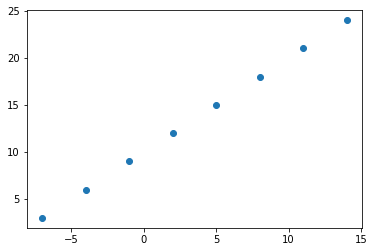

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and Ouput Shapes

In [102]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [103]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [104]:
# Turn our np arrays into tensors
X = tf.constant(tf.cast(X, dtype=tf.float32))
y = tf.constant(tf.cast(y, dtype=tf.float32))
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

## Steps in modeling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function - the function wich tells our model how wrong it is - and the optimizer, as well as evaluation metrics
3. **Fitting a model** - letting a model try to find patterns between X and y (features and labels)

In [105]:
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 163ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [106]:
# Try to make a prediction with this model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving the model

Because right now it sucks

In [107]:
# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# 3. fit the model
model.fit(X, y, epochs=100, verbose=0)

In [108]:
# Try to make a prediction with this model
y_pred = model.predict([17.0])
y_pred

array([[26.434414]], dtype=float32)

## Evaluating a model


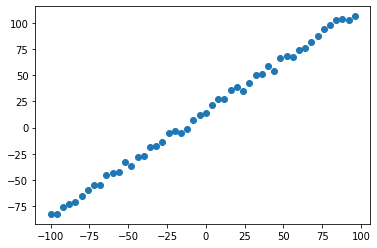

In [109]:
X = tf.range(-100, 100, 4, dtype=tf.float32)

y = X + 10.0
y = y + tf.random.uniform(y.shape, 0, 10, dtype=tf.float32)
plt.scatter(X, y)

## The three sets

* **Training set**: The data to train the model
* **Validation set**: The data to tune the model
* **Test set**: The data to evaluate the model

Proportions are usually 70% - 15% - 15% (or 70/30 if you skip the validation set)

In [110]:
# Split the data into train and test sets
X_train = X[:40] # first 40 samples
y_train = y[:40]

X_test = X[40:] # last 10 samples
y_test = y[40:]

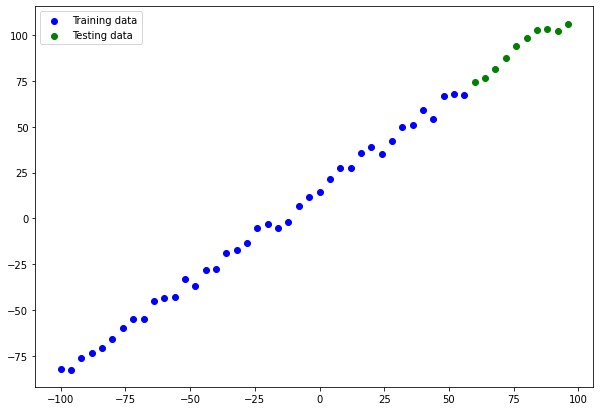

In [111]:
# Visualize train data
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [112]:
# Build a neural network to model the data
# import datetime
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="linear_regression_model")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# # 3. fit the model
model.fit(X_train, y_train, epochs=500, callbacks=[], verbose=0)

## Visualizing the model

In [113]:
model.summary()

Model: "linear_regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 100)               200       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non trainable params - parameters that are not updated during training (typical when bringin in already learn patterns ot parameters from other models during **transfer learning**)

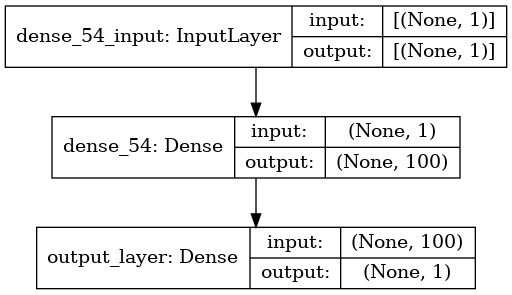

In [114]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualizing model predictions

In [115]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 76.05181 ],
       [ 80.09511 ],
       [ 84.138405],
       [ 88.18171 ],
       [ 92.225   ],
       [ 96.2683  ],
       [100.31161 ],
       [104.3549  ],
       [108.39819 ],
       [112.4415  ]], dtype=float32)

In [116]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training, test and predictions
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predicted data")
    plt.legend();

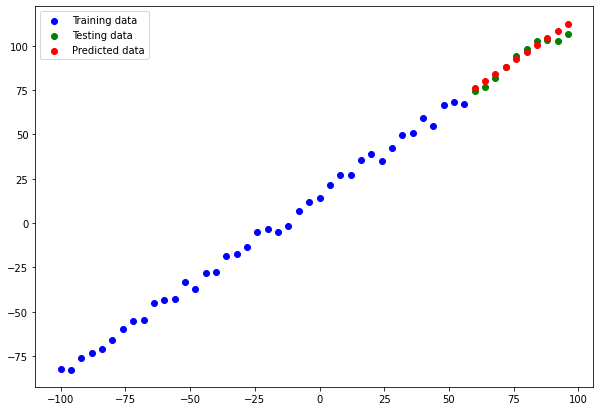

In [117]:
plot_predictions()

## Evaluating model predictions with regression evaluation metrics

In [118]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 68ms/step - loss: 2.7785 - mae: 2.7785


[2.7784743309020996, 2.7784743309020996]

In [119]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred, shape=(10,)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.7784743>

In [120]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.constant(y_pred, shape=(10,)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.097374>

In [121]:
# Tensorboard?
# %tensorboard --logdir logs/fit

### Saving models

In [122]:
model.save("saved_models/model1") # use .h5 for h5 format

INFO:tensorflow:Assets written to: saved_models/model1/assets


## A larger example

In [123]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
insurances = pd.read_csv("./datasets/insurance.csv")
insurances.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Numerical encoding
We need to encode the data in order to pass it to a dnn

In [125]:
insurances_one_hot = pd.get_dummies(insurances)
insurances_one_hot.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [126]:
X = insurances_one_hot.drop("charges", axis=1)
y = insurances_one_hot["charges"]
X.head(1), y.head(1)

(   age   bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.9         0           1         0          0           1   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  ,
 0    16884.924
 Name: charges, dtype: float64)

In [127]:
# Create train data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [128]:
# Build a dnn
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [129]:
# Check the results of the model against test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 621us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [130]:
tf.reduce_mean(y_train)

<tf.Tensor: shape=(), dtype=float64, numpy=13346.089736364485>

### Improve the model

1. Add an extra layer
2. Train for longer
3. ...

In [131]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [132]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 541us/step - loss: 4852.5464 - mae: 4852.5464


[4852.54638671875, 4852.54638671875]

In [133]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [134]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 485us/step - loss: 3500.3628 - mae: 3500.3628


[3500.36279296875, 3500.36279296875]

Text(0.5, 0, 'epochs')

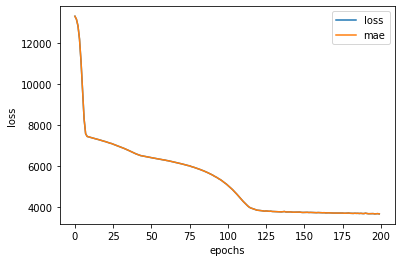

In [135]:
# Plot history (the loss/training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In terms of scaling values neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see wich performs better.

In [136]:
insurance = pd.read_csv("./datasets/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Use sklearn to prepare the data

In [137]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn these columns in values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)
len(X), len(X_train), len(X_test)

# Fit the column transformer to train our data
ct.fit(X_train)

# Transform trainig and test data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [138]:
# What does our data look like now?
X_train.loc[0], X_train_normal[0], X_train.shape, X_train_normal.shape

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 (1070, 6),
 (1070, 11))

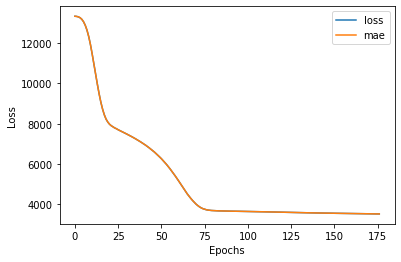

In [139]:
from plot import plot_loss_curve

tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

halt_when_no_longer_learning = tf.keras.callbacks.EarlyStopping(
    monitor="loss", min_delta=5, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

# Fit
history = insurance_model_4.fit(
    X_train_normal, y_train,
    epochs=200, verbose=0,
    callbacks=[halt_when_no_longer_learning]
)

plot_loss_curve(history)

In [140]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 528us/step - loss: 3219.2771 - mae: 3219.2771


[3219.277099609375, 3219.277099609375]

In [141]:
X_test_normal[0], insurance_model_4.predict(X_test_normal)[0]
# X_test_normal[0].shape

(array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]),
 array([9330.545], dtype=float32))

In [142]:
y_test.head(1)

764    9095.06825
Name: charges, dtype: float64